# <center> 神经网络的学习

学习指从训练数据中自动获取最优权重参数的过程。
学习的目的就是以损失函数为基准.找出使它的值大达到最小的权重参数.

## 从数据中学习
## 损失函数
神经网络以某个指标为基准,寻找最优权重参数,在神经网络学习中所用的指标称为<font color=#FF0000>**损失函数(loss function)**</font>

损失函数可以使用任意函数,但一般使用均方误差和交叉熵误差等。


``
损失函数是表示神经网络性能的"恶劣程度"的指标.即当前的神经网络对监督数据在多大数程度上不
拟合,在多大程度上不一致.以“性能的恶劣程度”为指标可能会使人感到不太自然，但是如 果给损失函数乘上一个负值，就可以解释为“在多大程度上不坏”， 即“性能有多好”。并且，“使性能的恶劣程度达到最小”和“使性 能的优良程度达到最大”是等价的，不管是用“恶劣程度”还是“优 良程度”，做的事情本质上都是一样的。
``


### 均方误差
<font color=#FF0000>均方误差(mean squared error)</font>表示如下

$$
E=\frac{1}{2}\sum_{k} (y_k - t_k)
$$

均方误差函数在python中表示如下
0.5 * np.sum((y - t) ** 2)

例:

In [77]:
import numpy as np

from node import base
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(base.mean_squared_error(np.array(y),np.array(t)))
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(base.mean_squared_error(np.array(y),np.array(t)))

0.09750000000000003
0.5975


### 交叉熵误差
**交叉熵误差(cross entropy error)**</font>也常被用作损失函数,表示如下:

$$
E=-\sum_{k} t_k ·logy_k
$$

$log$表示以$e$为底数的自然对数($log_e$)。
$y_k$是神经网络的输出,$t_k$是正确解的标签。
$t_k$是正确解的标签

自然对数图像下图

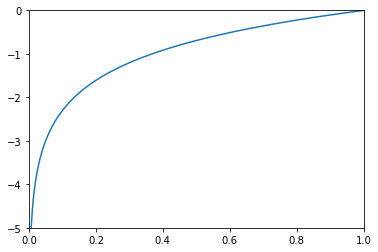

In [78]:
from matplotlib import pyplot as plt
import math
import numpy as np

x = np.arange(0.0000001,5,0.001) # 注意区间，因为logx中的x>0，所以这里的区间设置成[0.0000001,5)
y = []

for i in x:
    temp = math.log(i) # 使用math中的log函数生成对应x的值
    y.append(temp) # 放入到数组y中
plt.xlim(0,1) # x轴的数值显示范围
plt.ylim(-5,0)
plt.plot(x,y)  # Plot some data on the axes.
plt.show()

交叉熵误差python代码实现如下:
def cross_entropy_error(y, t):
&emsp;&emsp;delta = 1e-7
&emsp;&emsp;return -np.sum(t * np.log(y + delta))
其中delta是为了计算加上的微小值,当np.log(0)时
np.log(0)会变为负无穷.


### mini-batch学习
所有训练数据的损失函数的总和,以交叉熵误差为例。可以表示为

$$
E=-\frac{1}{N}\sum_{n} \sum_{k} t_n_k \,log \,y_n_k
$$
神经网络的学习也是从训练数据中选出一批数据(称为mini-batch,小批量)
然后对每个mini-batch进行学习.


In [79]:
import sys,os
sys.path.append(os.pardir)
import  numpy as np
from dataset.mnist import  load_mnist
(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10 # 10个为一批数据
batch_mask = np.random.choice(train_size,batch_size)
print(batch_mask)

(60000, 784)
(60000, 10)
[36598 15591 46372 23055 45292 24257 27034 49721 41780 53129]


使用np.random.choice(x,y) 选择随机索引

### mini-batch 版交叉熵误差的实现
代码实现
def cross_entropy_error(y,t):
&emsp;&emsp;if y.ndim == 1:
&emsp;&emsp;&emsp;t = t.reshape(1,t.size)
&emsp;&emsp;&emsp;y = y.reshape(1,y.size)

&emsp;&emsp; batch_size = y.shape[0]
&emsp;&emsp; return -np.sum(t * np.log(y + 1e-7)) / batch_size

y是神经网络的输出,t是监督数据.当y的纬度为1时,即求单个数据的交叉熵误差需要改变形状.
当输入为mini-batch时需要用batch的个数进行正规化,计算单个数据的平均交叉熵误差。

当监督数据标签为标签形式而不是one-hot表示时,交叉熵误差可通过以下实现

def cross_entropy_error(y,t):
&emsp;&emsp;if y.ndim == 1:
&emsp;&emsp;&emsp;t = t.reshape(1,t.size)
&emsp;&emsp;&emsp;y = y.reshape(1,y.size)

&emsp;&emsp; batch_size = y.shape[0]
&emsp;&emsp; return -np.sum(t * np.log(y[ np.arrange(batch_size) , t] + 1e-7)) / batch_size

### 为何要设定损失函数

识别精度对微小的参数变化基本上没有什么反应,即便有反应,值也是不连续的突然的变化的.

如果使用了阶跃函数那么即便将损失函数作为指标,参数的微小变化也会被阶跃函数的突然变化而抹除
sigmoid 的输出是连续变化的,曲线的斜率(导数)也是连续的.
sigmoid函数的导数在任何地方都不为0.神经网络得以进行
